# Backpropagation

We got a brief explaination of what a Neural network is, now let's understand how such networks are trained.

Let’s start by understanding how neural networks *learn* through something called **Backpropagation**.

At the heart of AI, backpropagation is an important algorithm that helps a neural network learn from its mistakes and get better at making predictions. 

Imagine teaching a student by telling them how close their answers are to the correct one, and then giving them feedback to improve their next guess. This is exactly what backpropagation does!

**Why do we need it ?**

A neural network is like a series of math equations. It takes an input (like an image of a dog), runs some calculations, and then produces an output (like saying whether it’s a dog or a cat). **But the first time the network makes a guess**, it’s usually not very accurate. 

Backpropagation helps the network learn from its mistake by adjusting its internal settings (called **weights** and **biases**) to improve the guess next time.

Let’s break this down step by step:

1. **Forward Propagation – Making a Guess**
   - Imagine you’re solving a math problem: You take the input (numbers), do some calculations, and come up with an answer.
   - In a neural network, the input is passed through layers, where each layer applies some math (a weighted sum + activation) to get a result.
   - This result is compared to the correct answer (the true label), and we calculate how *wrong* the network’s guess was. This is called the **loss** or **error**.

2. **Error – How Far Off Was the Guess?**
   - The error tells us how bad the guess was. Now, we need to figure out which parts of the network are responsible for that error.
   - But instead of saying “You’re wrong!” to the network, we give it specific feedback, like “This part of your guess needs fixing more than that part.”

3. **Backward Propagation – Learning from the Mistake**
   - This is where **derivatives** come in! Remember from high school calculus, a derivative tells you **how much one thing changes in response to another**. For example, the derivative of distance with respect to time gives you speed (how fast distance changes as time changes).
   - In backpropagation, we’re asking: **"How much does the error change when we change the weights and biases?**"
   - Using the **chain rule** from calculus, we calculate how changing each weight in the network would affect the error. Think of it like tracing your mistake backward through each math step.

4. **Derivatives and Gradients – Finding What to Fix**
   - The derivative we calculated tells us how much each weight contributed to the error. This gives us a **gradient**—a direction to move in to reduce the error.
   - Imagine you’re hiking in the mountains and want to reach the lowest point (the error’s minimum). The gradient points you in the direction of the steepest slope downward, telling you which way to go to reduce the error the fastest.

5. **Updating Weights – Fixing the Mistake**
   - Once we know which weights are responsible for the error, we adjust them slightly in the opposite direction (down the slope) to reduce the error. This process is called **gradient descent**.
   - The size of these adjustments is controlled by a **learning rate**—if the steps are too big, we might overshoot; if too small, learning is slow.

6. **Repetition – Practice Makes Perfect**
   - This process of guessing (forward propagation), learning from mistakes (backpropagation), and updating weights continues for many cycles. Over time, the network’s guesses improve, and the error gets smaller and smaller.


So, in summary, the learning process is simply adjusting the weights and biases that's it! The Neural Netowork does this by a process called Backpropagation. The steps are as follows:
1. Randomly **initialise weights**
2. __Forward Pass__: Predict a value using an activation function. 
3. See how bad you're performing using loss function (compare predicted value with actual value). 
4. __Backward Pass__: Backpropagate the error. That is, tell your network that it's wrong, and also tell what direction it's supposed to go in order to reduce the error. This step updates the weights (here's where the network learns!)
5. Repeat steps 2 & 3 until the error is reasonably small or for a specified number of iterations. 

Step 3 is the most important step. We'll mathematically derive the equation for updating the values. 


## Random Initialization

Before starting forward propagation we need to initialize Theta parameters. We can not assign zero to all thetas since this would make our network useless because every neuron of the layer will learn the same as its siblings. In other word we need to **break the symmetry**. In order to do so we need to initialize thetas to some small random initial values:

![theta-init](images/theta-init.svg)

> Though there are some algorithms which provides the initialization strategies to make the model learn faster (Ex: **Xavier Initialization**)

## Forward (or Feedforward) Propagation

Forward propagation is an interactive process of calculating activations for each layer starting from the input layer and going to the output layer.

For the simple network mentioned in a previous section above we're able to calculate activations for second layer based on the input layer and our network parameters:

![a-1-2](images/a-1-2.svg)

![a-2-2](images/a-2-2.svg)

![a-3-2](images/a-3-2.svg)

The output layer activation will be calculated based on the hidden layer activations:

![h-Theta-example](images/h-Theta-example.svg)

Where _g()_ function is activation functions that may be a sigmoid:

![sigmoid](images/sigmoid.svg)

![Sigmoid](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

### Vectorized Implementation of Forward Propagation

Now let's convert previous calculations into more concise vectorized form. Because vectorisation helps us to do calculations faster (compared to for loops)

![neuron x](images/neuron-x.svg)

To simplify previous activation equations let's introduce a _z_ variable:

![z-1](images/z-1.svg)

![z-2](images/z-2.svg)

![z-3](images/z-3.svg)

![z-matrix](images/z-matrix.svg)

> Don't forget to add bias units (activations) before propagating to the next layer.
> ![a-bias](images/a-bias.svg)

![z-3-vectorize](images/z-3-vectorized.svg)

![h-Theta-vectorized](images/h-Theta-vectorized.svg)

### Forward Propagation Example

Let's take the following network architecture with 4 layers (input layer, 2 hidden layers and output layer) as an example:

![multi-class-network](images/multi-class-network.drawio.svg)

In this case the forward propagation steps would look like the following:

![forward-propagation-example](images/forward-propagation-example.svg)

> Larger the architecture larger the number of layers, more the number of layers, more patterns can be learned by the model from your data . Intermediate layers are called as hidden layers


## Cost Function

Cost function is used to check how bad you're network is performing. One simple way to do that is subtract the predicted value and the actual value. For instance, if the actual value is 45 and your network is predicting 30, you can extrapolate you network is off by 15. 

In practise we don't use the simple subtraction, we instead **square**. Why do we square it? 

Well the square function has better mathematical properties (like it's a convex function and it's differentiable) which makes it easier for us to calculate the gradient.  


$$ \tag 1
MSE=\frac{1}{2m}\sum_{i=0}^m\left(y^{\left(i\right)} - h_{\theta}\left(x^{\left(i\right)}\right)\right)^2
$$

Which is simply the sum of the squared difference between the obeserved value and predicted value. 

In the above equation
1. MSE= Mean Square Error
1. m = number of examples
2. $h(\theta)$ = activation function
3. $x^{(i)}$ = the ith sample in the dataset
4. $y^{(i)}$ = output of ith sample in the dataset

To calculate the cost function $J(\theta)$, we will perform derivation of the loss function with respect to the weights. 

We'll be using sigmoid activation function which is simplest to illustrate while deriving Backpropagation. 

Derivation of the sigmoid function looks like this:

$$ \tag 2
\frac{\partial}{\partial x}\sigma\left(x\right)=\sigma\left(x\right)\cdot\left(1-\sigma\left(x\right)\right)
$$

We'll denote the above equation by $\sigma'\left(x\right)$

After doing derivation w.r.t to the weights, the cost function for the neuron network would similar to the logistic regression cost function.

![cost-function](images/cost-function.svg)

![h-Theta](images/h-Theta.svg)

![h-Theta-i](images/h-Theta-i.svg)

Here, $\frac{\lambda}{2m}$ is a L2 regularization (we will know about this in Optimazation techniques)

## Backpropagation

We have defined Forward propogation, Cost function (to calculate the loss w.r.t to each weight of the network), Now is the time to propogate the loss backward to every model weight and update them, so that we can reach closer to our end goal.

### Gradient Computation

Backpropagation algorithm has the same purpose as gradient descent for linear or logistic regression - **it corrects the values of thetas to minimize a cost function.**

In other words we need to be able to calculate partial derivative of cost function for each theta.

![J-partial](images/J-partial.svg)

![multi-class-network](images/multi-class-network.drawio.svg)

Let's assume that:

![delta-j-l](images/delta-j-l.svg) - "error" of node _j_ in layer _l_.

For each output unit (layer _L = 4_):

![delta-4](images/delta-4.svg)

Or in vectorized form:

![delta-4-vectorized](images/delta-4-vectorized.svg)

![delta-3-2](images/delta-3-2.svg)

![sigmoid-gradient](images/sigmoid-gradient.svg) - sigmoid gradient.

![sigmoid-gradient-2](images/sigmoid-gradient-2.svg)

Now we may calculate the gradient step:

![J-partial-detailed](images/J-partial-detailed.svg)


### Gradient Descent Algorithm

We now know how to compute the gradients per weight (parameter), our **Goal** is to minimize the cost function $J(\theta)$ to find the best parameters $\theta$ that fit our model to the data.

To achieve that, we need to follow gradient update steps iteratively till we reach convergance (Where difference between actual and expected is reduced to minimum)

**Repeat until convergence**:
  - For each iteration, update the parameters using the following rule:
    $$
    \theta_j := \theta_j - \alpha \cdot \frac{\partial}{\partial \theta_j} J(\theta)$$
  - $( \theta_j )$ is updated for each parameter in the model.
  
**Stop when**:
  - The change in $\theta_j$ between consecutive iterations **is very small**, indicating **convergence** (i.e., the cost function $J(\theta)$ has reached a minimum).

Where
- **$\theta_j$**:  Represents the $j$-th parameter (or weight) of the model. The model has multiple parameters ($\theta_0, \theta_1, \dots \theta_n$) depending on the number of features in the input data.
  
- **$\alpha$** (Learning Rate):  
  - The learning rate controls how big of a step we take in the direction of the gradient.  
  - **Small $\alpha$**: Slow learning (takes many iterations to converge).  
  - **Large $\alpha$**: Can lead to overshooting and potentially not converge at all.  
  - Typical values: $\alpha$ is often set between 0.01 and 0.1.

- **$\frac{\partial}{\partial \theta_j} J(\theta)$**:  
  - This is the partial derivative (gradient) of the cost function $J(\theta)$ with respect to the parameter $\theta_j$.  
  - The gradient tells us the slope of the cost function at the current parameter values.  
  - If the slope is positive, $\theta_j$ is decreased; if the slope is negative, $\theta_j$ is increased. This is because we want to move towards the minimum of the cost function.

- **Cost Function $J(\theta)$**:  
  - The cost function measures how far off the model's predictions are from the actual values in the training data.  
  - For linear regression, it's usually defined as:
    $$
    J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
    $$
  - Where:
    - $m$ is the number of training examples.
    - $h_\theta(x^{(i)})$ is the predicted value (hypothesis function).
    - $y^{(i)}$ is the actual value.

- **$m$** (Number of training examples): $m$ represents the number of examples in the training dataset.

- At each step of gradient descent, the parameters $\theta_j$ are updated in the opposite direction of the gradient of the cost function. This ensures we are moving toward the minimum value of the cost function.
  
- The learning rate $\alpha$ controls the size of these updates.
  

For each $j = 0, 1, \dots, n$, repeat the following update until convergence:

$$
\theta_j := \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

Where:
- $h_\theta(x^{(i)}) = \theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + \dots + \theta_n x_n^{(i)}$
  - This is the model's prediction (the hypothesis function).
- $x_j^{(i)}$ is the value of the $j$-th feature for the $i$-th training example.

- The algorithm stops when:
  - The change in $\theta_j$ between consecutive iterations is very small (convergence).
  - The maximum number of iterations is reached (sometimes used as a safety measure).


### Learning rate ($\alpha$)

The learning rate is a hyperparameter that controls the step size at each iteration while moving toward a minimum of a loss function. 

- **Too High**: If the learning rate is too high, the model may converge too quickly to a suboptimal solution or even diverge, failing to find the best minimum of the loss function.
- **Too Low**: If the learning rate is too low, the model will converge very slowly, requiring more iterations and computational resources to reach an optimal solution. It might also get stuck in local minima or plateau areas.

Let's understand it through a visualization

![learning rate](images/learning-rate.png)

If you want to see yourself, how different values of learning rate impacts the gradient behaviour, try below visualization

1. Add a large learning rate of say 2 and keep clicking on **Next iteration** to check how loss reduces or it gets divergent after some time
2. Add a very small learning rate of 0.001 and keep clicking on **Next iteration** to check how much time it takes to converge
3. Add a medium learning rate of say 0.1 and check how much time it takes to converge

<iframe src="https://uclaacm.github.io/gradient-descent-visualiser/#playground" width="100%" height="600"></iframe>


> Notice how the loss reduces and as we approach closer to the minimum, the number of iteration increases for convergence


<div class='alert alert-block alert-info' role='alert'>
🔎 <strong>Hyperparameters</strong> in machine learning are settings that are chosen before the model training process begins and control the learning behavior of the model. 

They differ from model parameters (like weights) as they are not learned from the data. Proper tuning of hyperparameters is critical for optimizing model performance.

Some of them are:

1. **Learning Rate**:
2. **Batch Size:**
3. **Number of Epochs:**
4. **Number of Layers and Neurons:**
5. **Dropout Rate:**
6. **Optimizer:**
7. **Weight Initialization:**
8. many more...
   
These hyperparameters can significantly impact the performance of a neural network and are typically tuned through experimentation or automated search methods like grid search or random search.
</div>


## Implementation 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from scipy.io import loadmat

data = loadmat("machine_learning_andrewng/ex4data1.mat")
weights = loadmat("machine_learning_andrewng/ex3weights.mat")
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [20]:
X = data['X']
y = data['y']
#one-hot encoding the y values
y = pd.get_dummies(y.ravel()).values
theta1_loaded = weights["Theta1"]
theta2_loaded = weights["Theta2"]

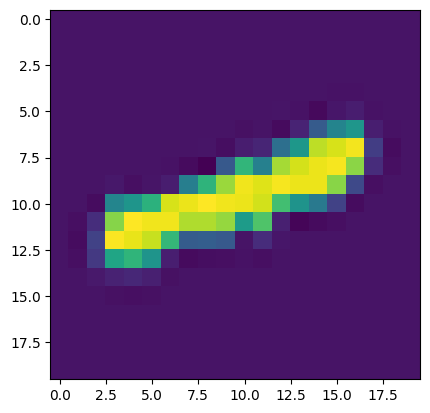

In [13]:
plt.imshow(X[900].reshape(20,20))

In this implementation we will use MNIST dataset, which is a set of handwritten number images from 1-10, our task is correctly detect these hand written digits

The image size is 20x20 pixels, which we have already flattened in the dataset to (400,)


In [14]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from time import time

class NeuralNetwork:
    """Creates Neural Network for MNIST dataset."""

    def __init__(self, hidden_size=25, output_size=10, lambda_=0):
        """
        Initialize the neural network with:
        - hidden_size: Number of neurons in the hidden layer
        - output_size: Number of output neurons (MNIST has 10 digits, so 10 outputs)
        - lambda_: Regularization parameter to prevent overfitting
        """
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.thetas = None  # Placeholder for network parameters (weights)
        self.lambda_ = lambda_  # Regularization coefficient
        self.X = None  # Placeholder for input data
        self.y = None  # Placeholder for target data
        self.input_size = 0  # Input layer size will be set based on data
    
    @staticmethod
    def sigmoid(z):
        """Activation function: Sigmoid used to introduce non-linearity"""
        return 1 / (1 + np.exp(-z))
    
    @staticmethod
    def flatten(arr1, arr2):
        """Flatten two matrices into a single vector (for optimization purposes)"""
        return np.r_[arr1.flatten(), arr2.flatten()]
    
    def set_params(self, *thetas):
        """Set thetas (weights) by flattening and assigning them"""
        self.thetas = self.flatten(*thetas)
    
    def unflatten(self, arr):
        """
        Reshape the flattened thetas vector back into two separate matrices.
        theta1 corresponds to input-to-hidden weights.
        theta2 corresponds to hidden-to-output weights.
        """
        theta1 = arr[:self.hidden_size * (self.input_size + 1)]
        theta1 = theta1.reshape(self.hidden_size, self.input_size + 1)
        theta2 = arr[self.hidden_size * (self.input_size + 1):]
        theta2 = theta2.reshape(self.output_size, self.hidden_size + 1)
        return theta1, theta2
    
    def init_random_thetas(self, epsilon=0.12):
        """
        Initialize random values for weights (theta1 and theta2) with a small range to avoid symmetry.
        The weights are initialized within [-epsilon, epsilon].
        """
        theta1 = np.random.rand(self.hidden_size, self.input_size + 1) * 2 * epsilon - epsilon
        theta2 = np.random.rand(self.output_size, self.hidden_size + 1) * 2 * epsilon - epsilon
        return self.flatten(theta1, theta2)

    def sigmoid_prime(self, z):
        """Derivative of the sigmoid function, used in backpropagation"""
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def cross_entropy(self, thetas=None):
        """
        Compute the cross-entropy loss, including regularization.
        Loss measures the difference between predicted and actual values.
        """
        if thetas is None:
            theta1, theta2 = self.unflatten(self.thetas)
        else:
            theta1, theta2 = self.unflatten(thetas)

        m = self.X.shape[0]  # Number of training examples
        
        # Perform a forward pass to calculate the predicted values
        y_pred = self.forward_pass(thetas)
        
        # Calculate the loss: negative log-likelihood of the true values
        positive_loss = np.sum(np.multiply(self.y, np.log(y_pred)).flatten())
        negative_loss = np.sum(np.multiply((1 - self.y), np.log(1 - y_pred)).flatten())
        
        # Add regularization term to prevent overfitting
        regularization = (self.lambda_ / (2 * m)) * (np.sum(theta1.flatten() ** 2) + np.sum(theta2.flatten() ** 2))
        
        # Final cost function with regularization
        J = - (1 / m) * (positive_loss + negative_loss) + regularization
        return J

    def forward_pass(self, thetas=None, elaborate=False):
        """
        Perform a forward pass through the network.
        Calculate activations for each layer and return the output.
        """
        if thetas is None:
            theta1, theta2 = self.unflatten(self.thetas)
        else:
            theta1, theta2 = self.unflatten(thetas)
        
        # Add bias to input data (a1)
        a1 = np.c_[np.ones(self.X.shape[0]), self.X]
        
        # Hidden layer (z2, a2)
        z2 = theta1.dot(a1.T)  # Compute z2 (hidden layer input)
        a2 = self.sigmoid(z2.T)  # Apply activation function (sigmoid) to get a2
        
        # Add bias to hidden layer activations
        a2 = np.c_[np.ones(a2.shape[0]), a2]
        
        # Output layer (z3, a3)
        z3 = theta2.dot(a2.T)
        a3 = self.sigmoid(z3.T)
        
        # If requested, return intermediate activations for backpropagation
        if elaborate:
            return (a1, a2, a3), (z2, z3)
        return a3

    def backward_pass(self, thetas=None):
        """
        Perform a backward pass to compute gradients for weight updates.
        This implements the backpropagation algorithm.
        """
        if thetas is None:
            theta1, theta2 = self.unflatten(self.thetas)
        else:
            theta1, theta2 = self.unflatten(thetas)

        # Forward pass to get all activations
        (a1, a2, y_pred), (z2, z3) = self.forward_pass(thetas, elaborate=True)

        # Compute the error in the output layer
        delta3 = np.multiply((y_pred - self.y), self.sigmoid_prime(z3.T))

        # Gradient for theta2
        theta2_grad = a2.T.dot(delta3)
        theta2_grad = theta2_grad.T  # Ensure shape matches theta2

        # Compute the error in the hidden layer
        delta2 = np.multiply(delta3.dot(theta2[:, 1:]), self.sigmoid_prime(z2.T))

        # Gradient for theta1
        theta1_grad = a1.T.dot(delta2)
        theta1_grad = theta1_grad.T

        return self.flatten(theta1_grad, theta2_grad)

    def gradient_descent(self, X, y, n_epochs=1000, alpha=0.001):
        """
        Perform gradient descent optimization to minimize the cost function.
        """
        # Initialize random weights (thetas)
        self.thetas = self.init_random_thetas()
        theta1, theta2 = self.unflatten(self.thetas)

        # Loop over epochs to update thetas using gradients
        for i in range(1, n_epochs + 1):
            # Compute cost for current thetas
            cost = self.cross_entropy()
            print("\rIteration: {0} Cost: {1}".format(i, cost), end="")
            
            # Compute gradients
            theta1_grad, theta2_grad = self.unflatten(self.backward_pass())

            # Update weights (thetas) using gradients
            theta1 = theta1 - alpha * theta1_grad
            theta2 = theta2 - alpha * theta2_grad

            # Flatten the updated weights and set them as the current parameters
            self.thetas = self.flatten(theta1, theta2)
        print()

    def fmin_unc(self, X, y, **params):
        """
        Use scipy's minimize function to optimize the weights using unconstrained optimization.
        """
        self.thetas = self.init_random_thetas()
        res = minimize(self.cross_entropy, self.thetas, jac=self.backward_pass,
                       method="tnc", options=params)
        print(res)

    def fit(self, X, y):
        """
        Fit the model with training data (X) and labels (y).
        It sets the input size based on the training data and ensures
        that the number of output neurons matches the number of labels.
        """
        if y.shape[1] != self.output_size:
            raise ValueError("Number of columns in y ({0}) are != to number of output neurons ({1})"
                             .format(y.shape[1], self.output_size))
        self.X = X
        self.y = y
        self.input_size = X.shape[1]
    
    def train(self, method="gradient_descent", **params):
        """
        Train the model using either gradient descent or unconstrained optimization.
        It measures the training time.
        """
        start_time = time()
        if method == "gradient_descent":
            self.gradient_descent(X, y, **params)
        else:
            self.fmin_unc(X, y, **params)
        print("Training time: {0:.2f} secs".format(time() - start_time))


In [15]:
nn = NeuralNetwork(hidden_size=25, output_size=10)
nn.fit(X, y)
print("Training using Gradient Descent")
nn.train()

Training using Gradient Descent
Iteration: 1000 Cost: 0.4521438114818742
Training time: 6.80 secs


In [16]:
nn = NeuralNetwork(hidden_size=25, output_size=10)
nn.fit(X, y)
print("Training using Newton's Conjugate Gradient")
nn.train(method="newton", maxiter=1000)

Training using Newton's Conjugate Gradient


/var/folders/2g/fd5fqwvd6x5cd9_2fspz1xh40000gp/T/ipykernel_81976/4005965860.py:177: OptimizeWarning: Unknown solver options: maxiter
  res = minimize(self.cross_entropy, self.thetas, jac=self.backward_pass,


 message: Converged (|f_n-f_(n-1)| ~= 0)
 success: True
  status: 1
     fun: 0.44474797884435985
       x: [-1.580e+00  1.086e-01 ... -3.269e+00  2.960e+00]
     nit: 25
     jac: [ 2.042e+00  0.000e+00 ... -5.364e-02 -1.743e-01]
    nfev: 342
Training time: 2.42 secs


In [21]:
nn = NeuralNetwork(hidden_size=25, output_size=10)
nn.fit(X, y)
nn.set_params(theta1_loaded, theta2_loaded)
nn.cross_entropy()

np.float64(0.2876291651613189)

## References

- [Machine Learning on Coursera](https://www.coursera.org/learn/machine-learning)
- [But what is a Neural Network? By 3Blue1Brown](https://www.youtube.com/watch?v=aircAruvnKk)
- [Neural Network on Wikipedia](https://en.wikipedia.org/wiki/Artificial_neural_network)
- [TensorFlow Neural Network Playground](https://playground.tensorflow.org/)
- [Deep Learning by Carnegie Mellon University](https://insights.sei.cmu.edu/sei_blog/2018/02/deep-learning-going-deeper-toward-meaningful-patterns-in-complex-data.html)
